In [1]:
include("smc_model.jl")
include("smc_model_parameters.jl")
using DifferentialEquations
using DiffEqSensitivity 
using Plots
gr()
using DataFrames

q0 = Control_params();
p0 = Fixed_params();
s0 = State();
q0_dict = type2dict(q0);
s0_dict = type2dict(s0);
(q0_elevated,s0_elevated) = evaluted(q0_dict);


┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1186
┌ Info: Recompiling stale cache file /Users/josh/.julia/compiled/v1.1/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1184
┌ Info: Precompiling DiffEqSensitivity [41bf760c-e81c-5289-8e54-58b1f1f8abe2]
└ @ Base loading.jl:1186
┌ Info: Recompiling stale cache file /Users/josh/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [21]:
(output, problem, solution) = solveODEs(
    s0_elevated,q0_elevated,
    timespan=(0.0,60*30),
    fix = ["Ca_mit","Ca_ecs"]
    ,dtmax=100);

In [26]:
prob1 = remake(problem;u0=s0_elevated,p=q0_elevated);
prob1.u0

State
  Ca_cyt: Float64 0.1
  Ca_er: Float64 500.0
  Ca_ecs: Float64 1300.0
  Ca_mit: Float64 0.25
  Ca_mit_source: Float64 0.0
  Ca_ecs_source: Float64 0.0
  Na_cyt: Float64 1000.0
  Na_ecs: Float64 138000.0
  K_cyt: Float64 140000.0
  K_ecs: Float64 3500.0
  Phi_mit: Float64 160.0
  Phi_ecs: Float64 -54.03
  RyRR10: Float64 0.003272844453161682
  IP3RX00: Float64 0.7475182747791806
  IP3RX01: Float64 0.24305426733899077
  IP3RX10: Float64 0.00482090403003259
  RyRR11: Float64 5.844071428483013e-6
  MyoMp: Float64 0.01869880291294156
  MyoAMp: Float64 0.014183208692474311
  IP3: Float64 0.007381134758775144
  RyRR01: Float64 0.001775610994991665
  MyoAM: Float64 0.06061200295929193
  ATP: Float64 3000.0
  ADP: Float64 300.0
  Glu: Float64 1.0
  pH_cyt: Float64 7.1
  pH_mit: Float64 7.8
  G: Float64 3.319900335449676e-5
  PIP2: Float64 118.51306047380106


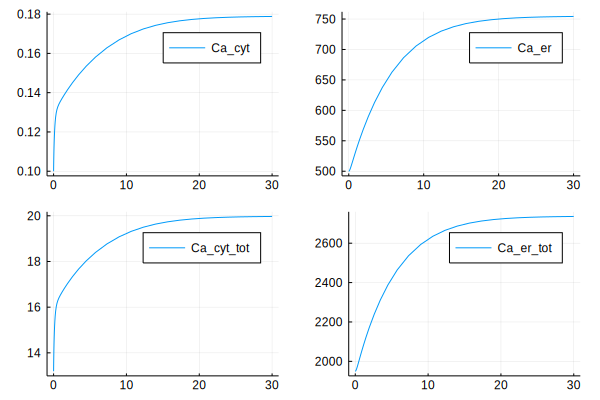

In [10]:
p1 = plot(output[:t]/60,output[:Ca_cyt],label="Ca_cyt")
p3 = plot(output[:t]/60,output[:other_Ca_cyt_tot],label="Ca_cyt_tot")

p2 = plot(output[:t]/60,output[:Ca_er],label="Ca_er")
p4 = plot(output[:t]/60,output[:other_Ca_er_tot],label="Ca_er_tot")

plot(p1,p2,p3,p4)

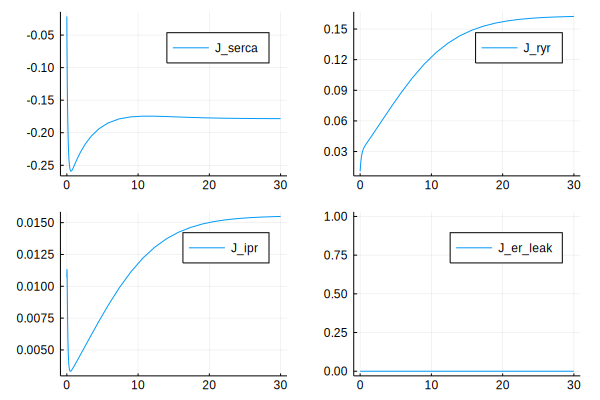

In [93]:
p1 = plot(output[:t]/60,output[:J_serca],label="J_serca")
p2 = plot(output[:t]/60,output[:J_ryr],label="J_ryr")
p3 = plot(output[:t]/60,output[:J_ipr],label="J_ipr")
p4 = plot(output[:t]/60,output[:J_leak_er],label="J_er_leak")
plot(p1,p2,p3,p4,layout=(2,2))

In [17]:
q_range=[[30,40],[1,200],[0,1],[0,0.1],[0,0.01],[0,0.1],[0.01,1],[200,1000],[1000,7000],[1,100],[0,1],[1000,5000],[1,100],[0,10],[0,10],[0,1],[0,0.0001],[0,1],[0,0.1]]

19-element Array{Array{Float64,1},1}:
 [30.0, 40.0]    
 [1.0, 200.0]    
 [0.0, 1.0]      
 [0.0, 0.1]      
 [0.0, 0.01]     
 [0.0, 0.1]      
 [0.01, 1.0]     
 [200.0, 1000.0] 
 [1000.0, 7000.0]
 [1.0, 100.0]    
 [0.0, 1.0]      
 [1000.0, 5000.0]
 [1.0, 100.0]    
 [0.0, 10.0]     
 [0.0, 10.0]     
 [0.0, 1.0]      
 [0.0, 0.0001]   
 [0.0, 1.0]      
 [0.0, 0.1]      

In [18]:
q = [(q_range[j][2] -q_range[j][1])*rand() + q_range[j][1] for j in 1:length(q_range)]

19-element Array{Float64,1}:
   39.24088874599091     
   69.22771907096009     
    0.9247313621117081   
    0.09831902264280135  
    0.0065242949038864404
    0.08640599430953276  
    0.1705145027704146   
  677.6253487492679      
 3272.1559841225735      
   63.685049890027514    
    0.8437637083803728   
 2779.7954550902787      
   99.00252461775374     
    6.84380891693916     
    5.283843776525883    
    0.9474140988344306   
    8.931850022599039e-5 
    0.04734982936822796  
    0.0177214141094461   

In [96]:
q[1]

33.24487274894052

In [12]:
(q0_elevated,s0_elevated) = evaluted(q0_dict);

In [13]:
q0_elevated

Control_params
  SERCA: Float64 34.83566853063814
  SERCA_s: Float64 5.0
  Qvocc: Float64 0.0194702395878822
  g_leak_mit: Float64 0.0019329183755917355
  g_leak_ecs: Float64 0.000738482193319374
  k_leak_er: Float64 0.0
  Ca_cyt_infty: Float64 0.1
  Ca_er_infty: Float64 500.0
  ATP_infty: Float64 3000.0
  ADP_infty: Float64 10.0
  Qryr: Float64 2.0
  Qip3r: Float64 4.0
  MyoTot: Float64 10.0
  Qncx: Float64 1.85
  Qpmca: Float64 0.0103211
  Vnclx: Float64 0.025655
  Vmcu: Float64 4.398e-6
  kncx2: Float64 1.2480000000000002
  L: Float64 0.0


In [14]:
(q0_elevated,s0_elevated) = give_rand_qs(q_range,q0_dict,s0_dict);

MethodError: MethodError: no method matching evaluted(::Dict{Symbol,Any}, ::Dict{Symbol,Any})
Closest candidates are:
  evaluted(::Any) at /Users/josh/workspace/postcsd_calcium/numerics/wholecell/smc_model.jl:392

In [15]:
q0_elevated

Control_params
  SERCA: Float64 34.83566853063814
  SERCA_s: Float64 5.0
  Qvocc: Float64 0.0194702395878822
  g_leak_mit: Float64 0.0019329183755917355
  g_leak_ecs: Float64 0.000738482193319374
  k_leak_er: Float64 0.0
  Ca_cyt_infty: Float64 0.1
  Ca_er_infty: Float64 500.0
  ATP_infty: Float64 3000.0
  ADP_infty: Float64 10.0
  Qryr: Float64 2.0
  Qip3r: Float64 4.0
  MyoTot: Float64 10.0
  Qncx: Float64 1.85
  Qpmca: Float64 0.0103211
  Vnclx: Float64 0.025655
  Vmcu: Float64 4.398e-6
  kncx2: Float64 1.2480000000000002
  L: Float64 0.0
